In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
len(data)

768

In [4]:
data.shape

(768, 9)

In [5]:
data.count() #it counts only null values

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.describe().T # T= transpose row to column , column to row

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
Healthy = data[(data['Outcome'] == 0)]
Diabetic= data[(data['Outcome'] == 1)]

In [10]:
H=Healthy.shape[0]

In [11]:
D=Diabetic.shape[0]

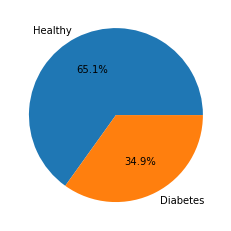

In [12]:
typee=[H,D]
label=['Healthy','Diabetes']

plt.pie(typee,labels=label,autopct="%0.1f%%")
plt.show()

### As we can see that in all the columns there are zero values which should not be there so we will check how many zero values are there in each column 

In [13]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [14]:
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### As we can we all the above values are missing in the data

Text(0.5, 1.0, 'MISSING VALUES IN THE COLUMNS')

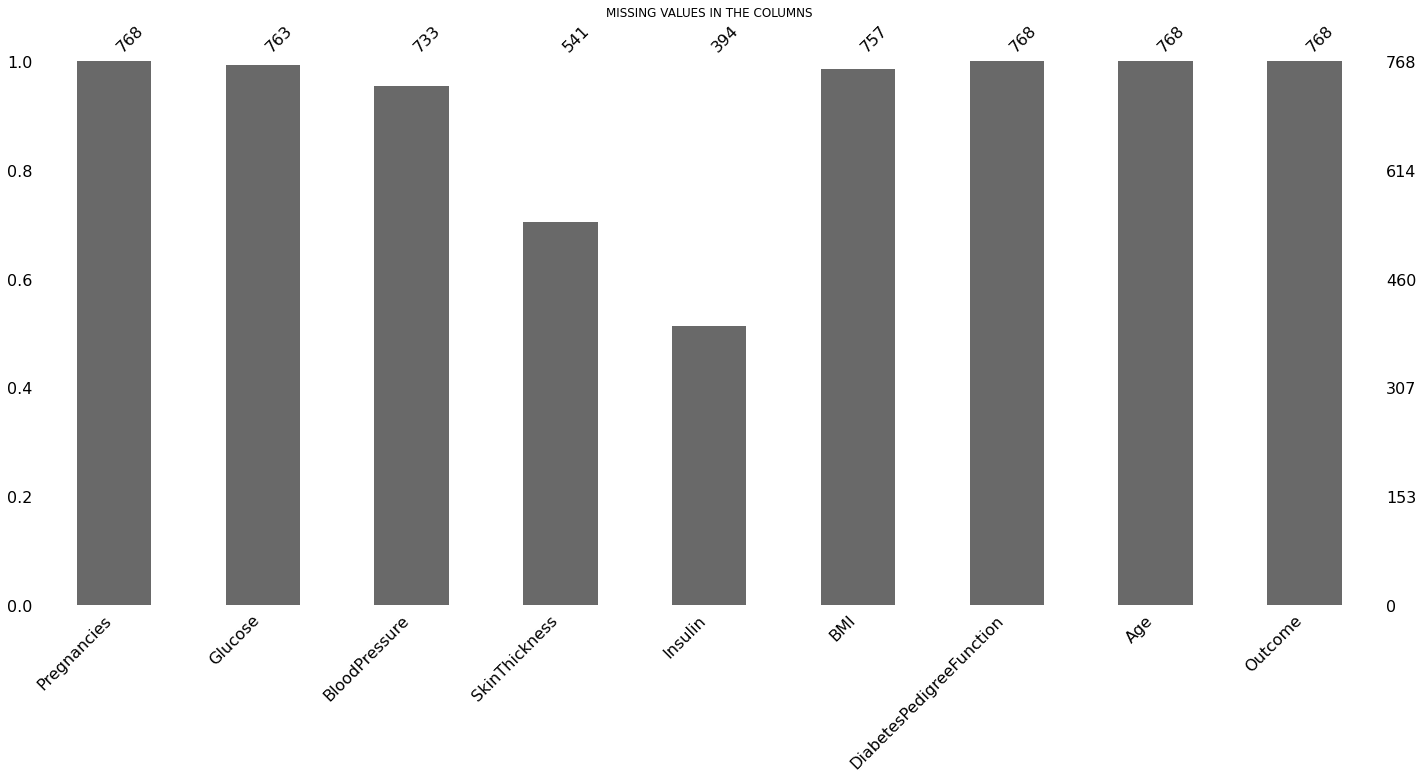

In [15]:
import missingno as msno
msno.bar(data)
#plt.show()
plt.title("MISSING VALUES IN THE COLUMNS")

### Columns with missing values i.e. with NAN 

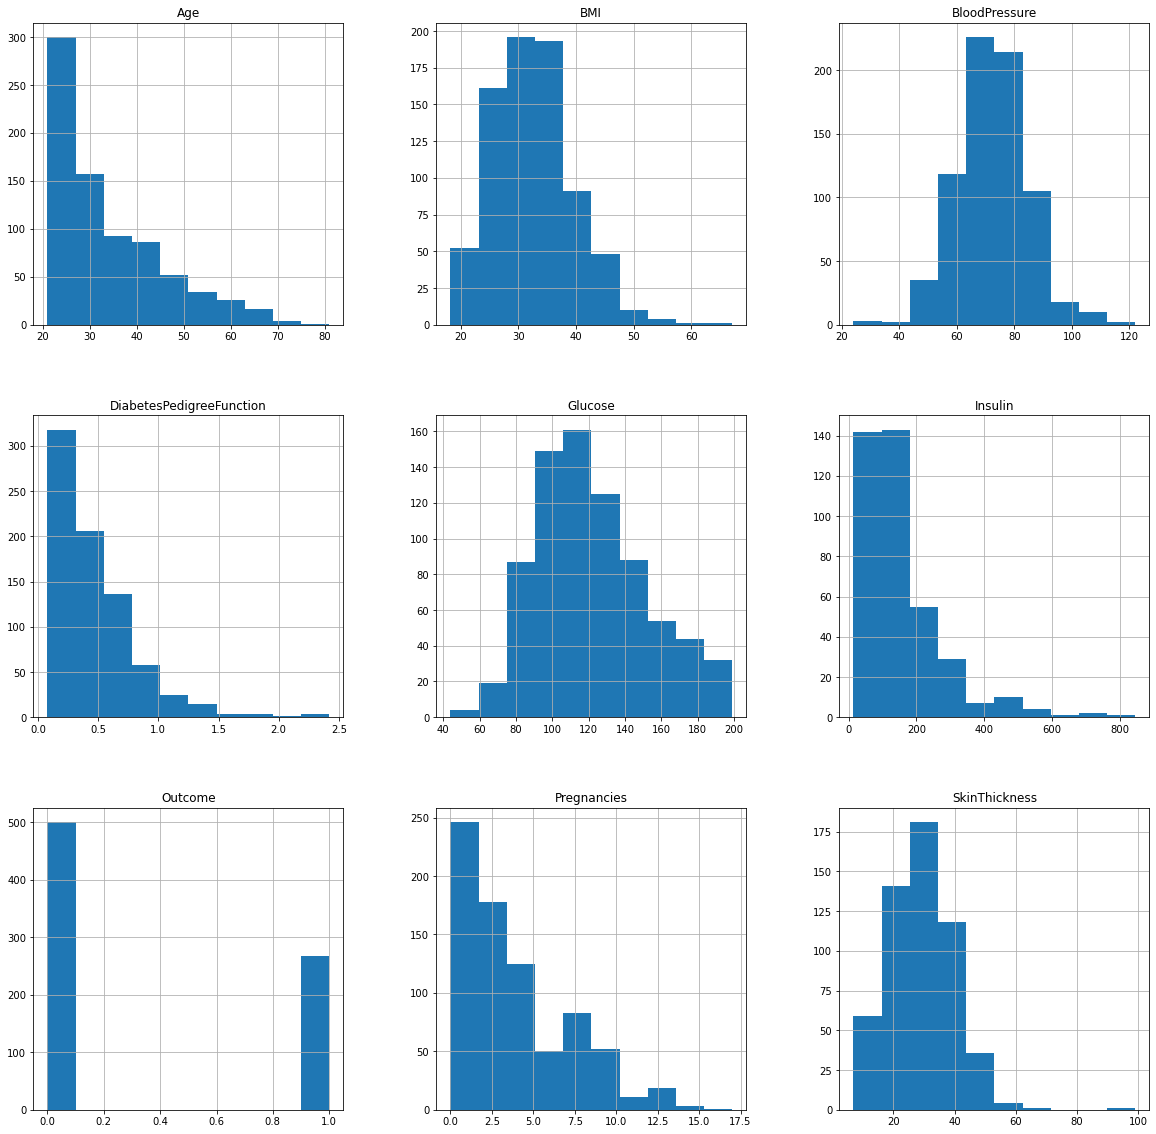

In [16]:
p = data.hist(figsize = (20,20))

### Filling the missing values with median

In [17]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [18]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


### Putting the median values in the place on nan

In [19]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

In [20]:
median_target('Pregnancies')

,Outcome,Pregnancies
0,0,2
1,1,4


In [21]:
data.loc[(data['Outcome'] == 0 ) & (data['Pregnancies'].isnull()), 'Pregnancies'] = 2
data.loc[(data['Outcome'] == 1 ) & (data['Pregnancies'].isnull()), 'Pregnancies'] = 4

In [22]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [23]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107.0
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140.0

In [24]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [25]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [26]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [27]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32.0

In [28]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [29]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

In [30]:
median_target('DiabetesPedigreeFunction')

,Outcome,DiabetesPedigreeFunction
0,0,0.336
1,1,0.449


In [31]:
data.loc[(data['Outcome'] == 0 ) & (data['DiabetesPedigreeFunction'].isnull()), 'DiabetesPedigreeFunction'] = 0.336
data.loc[(data['Outcome'] == 1 ) & (data['DiabetesPedigreeFunction'].isnull()), 'DiabetesPedigreeFunction'] = 0.449

In [32]:
median_target('Age')

,Outcome,Age
0,0,27
1,1,36


In [33]:
data.loc[(data['Outcome'] == 0 ) & (data['Age'].isnull()), 'Age'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['Age'].isnull()), 'Age'] = 36

### Plotting with all the values filled

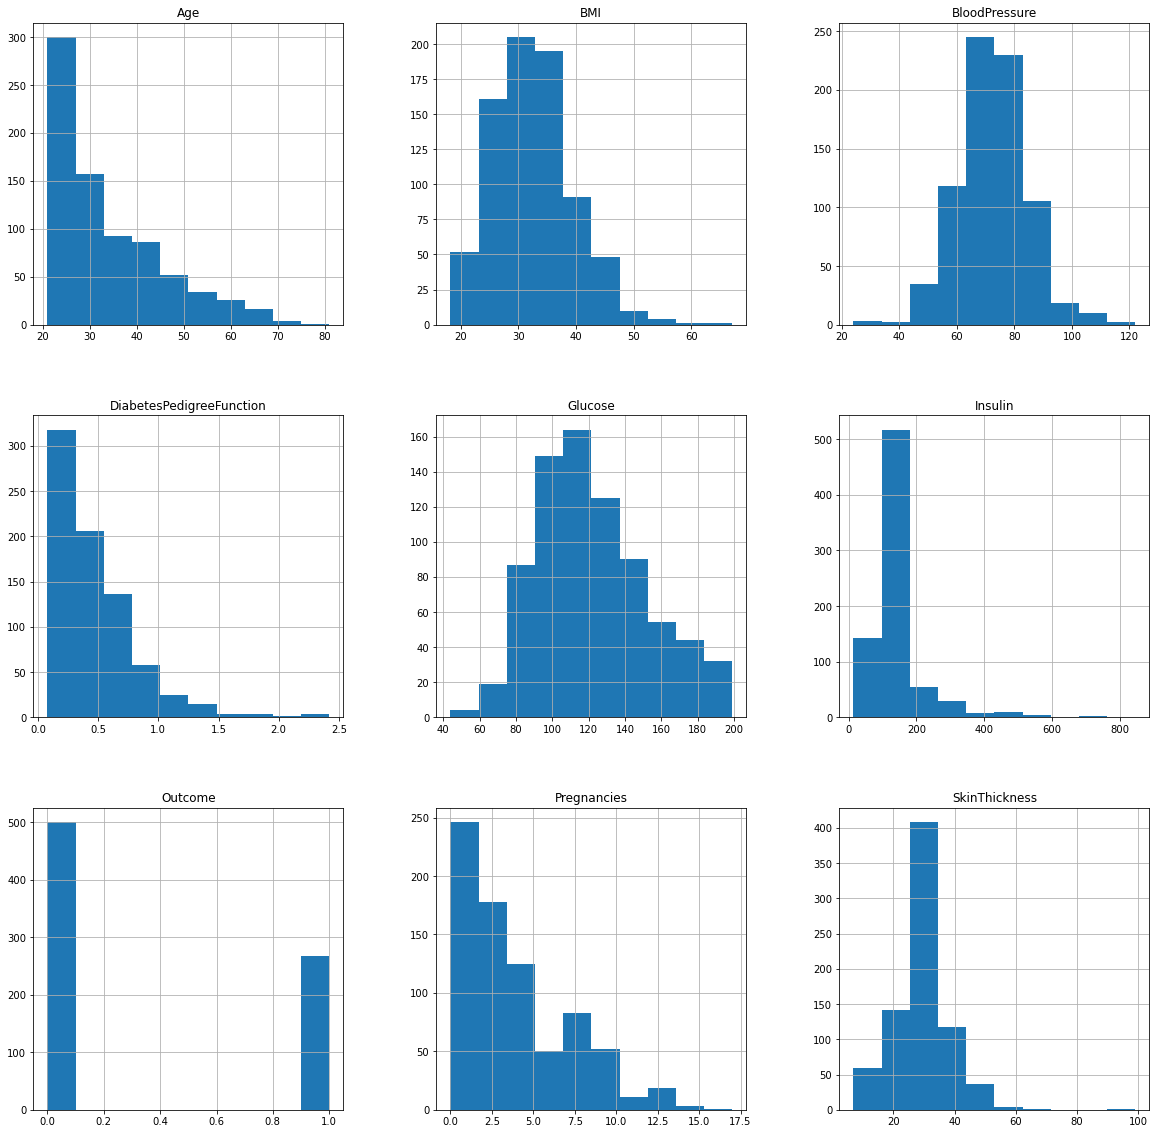

In [34]:
q = data.hist(figsize = (20,20))

### Checking the null count

Text(0.5, 1.0, 'CHECKING FOR THR MISSING VALUES IN THE COLUMNS')

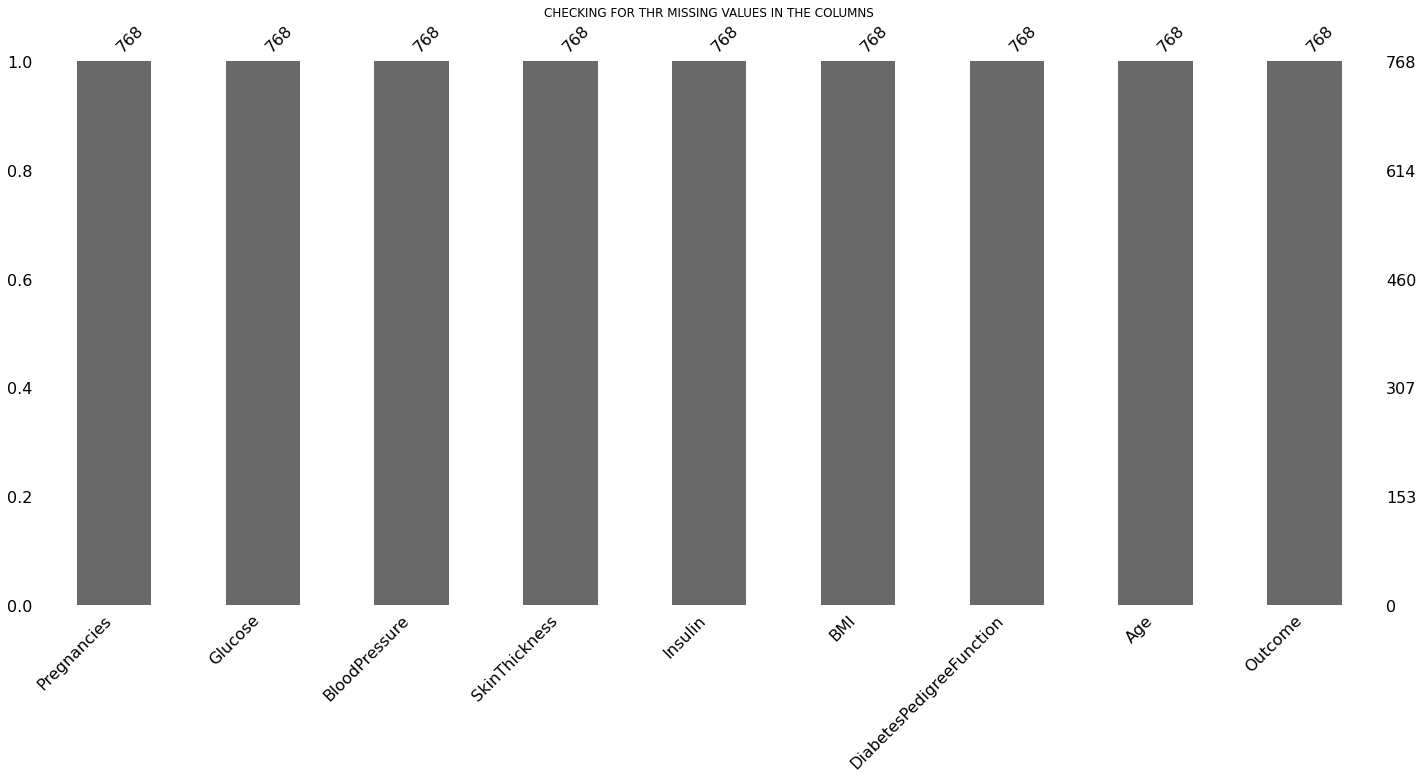

In [35]:
import missingno as msno
msno.bar(data)
#plt.show()
plt.title("CHECKING FOR THR MISSING VALUES IN THE COLUMNS")

C:\Users\Bhavna Kumari\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


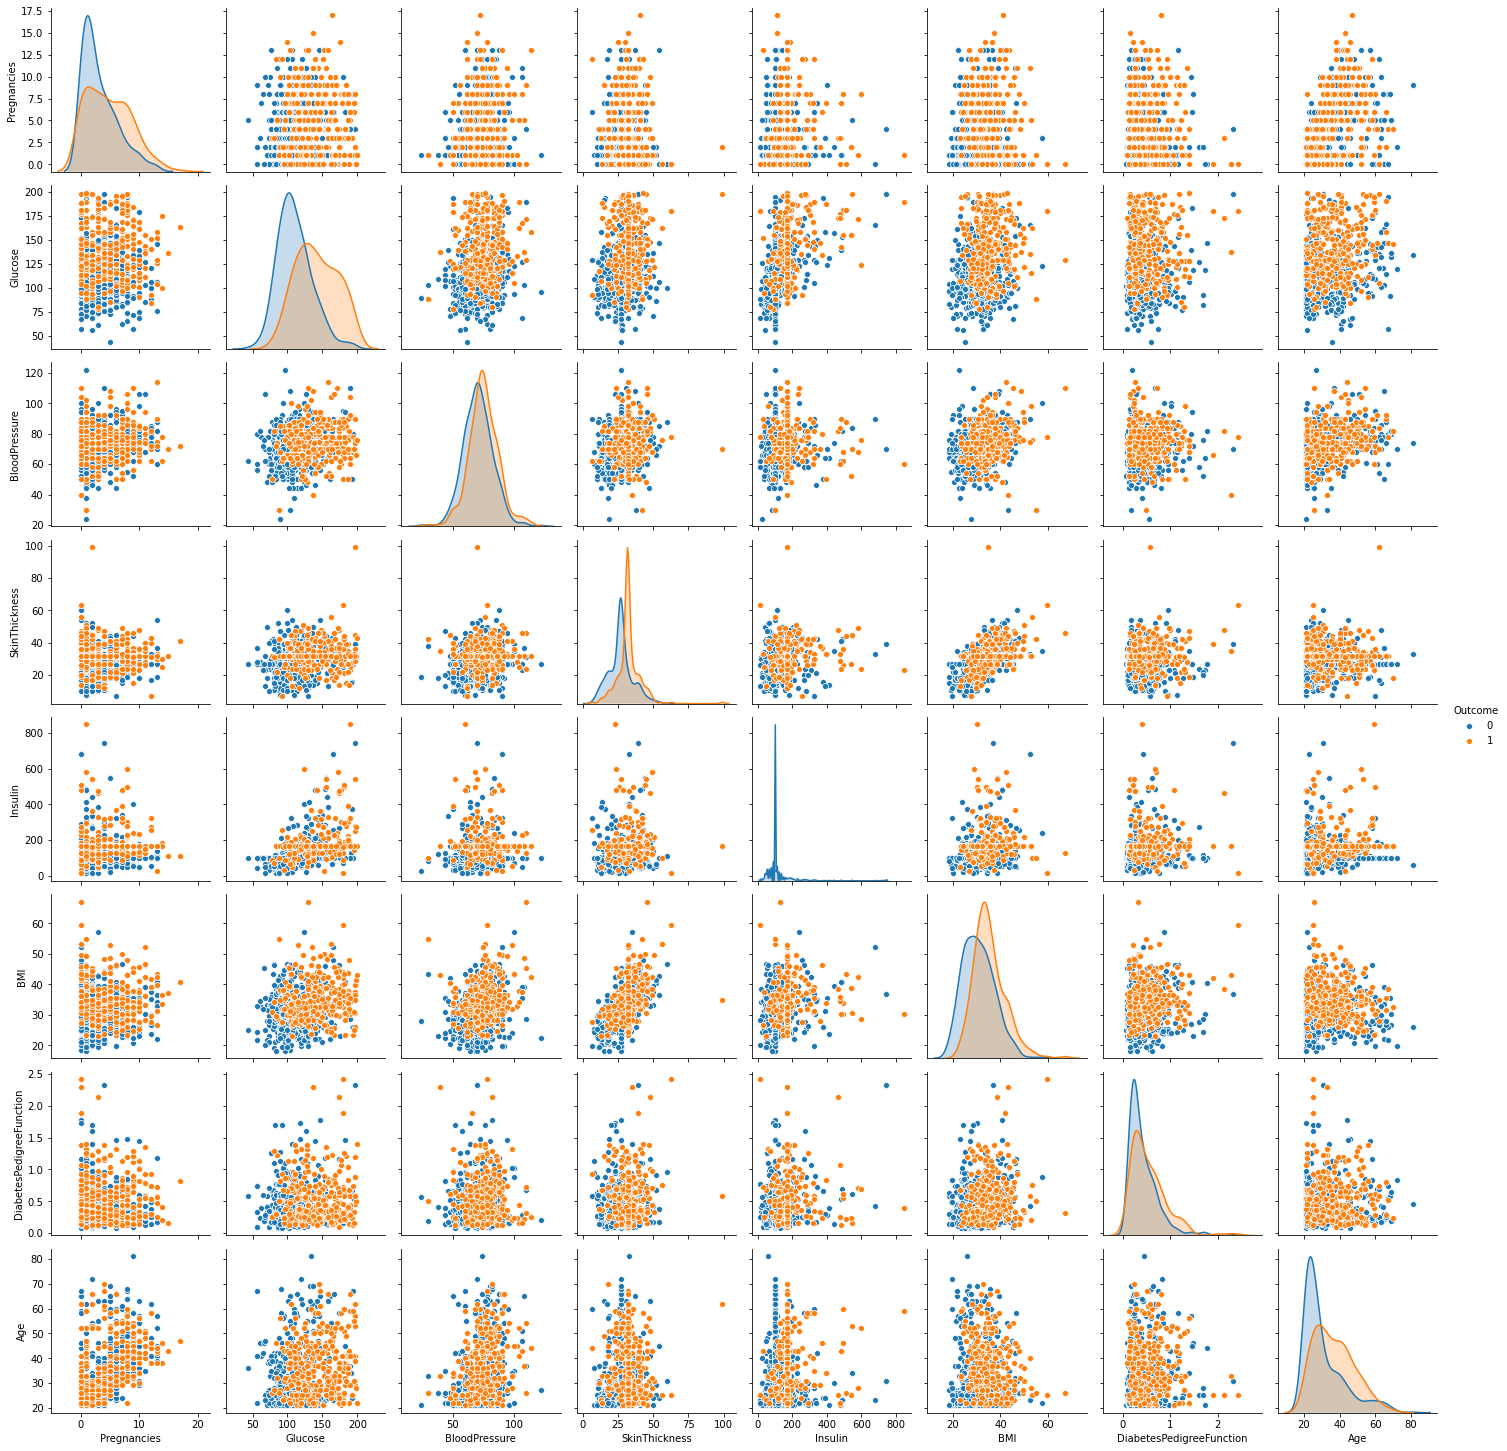

In [36]:
p=sns.pairplot(data, hue = 'Outcome')

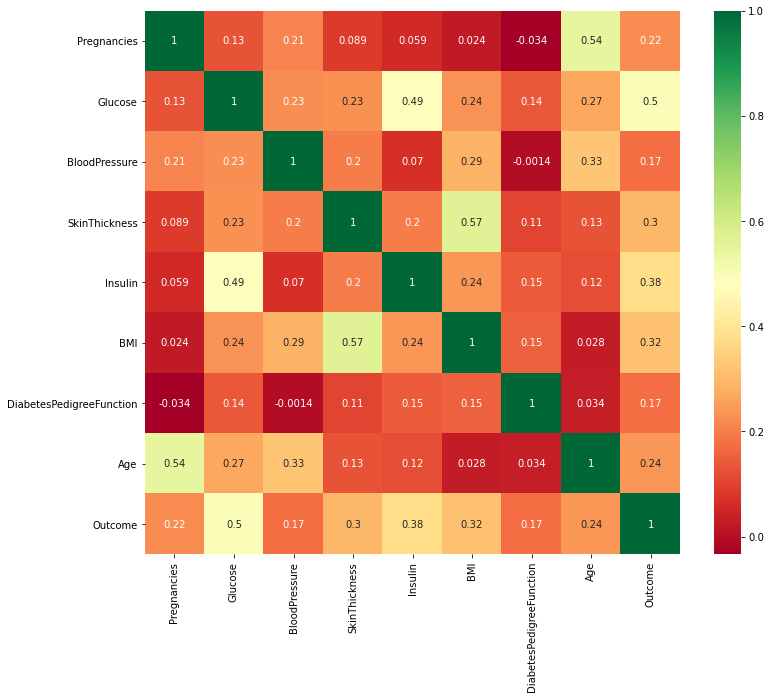

In [37]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [38]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [39]:
X=data.iloc[:,:-1]

In [40]:
X.shape

(768, 8)

In [41]:
y=data.iloc[:,-1]

In [42]:
y.shape

(768,)

In [43]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[139  15]
 [ 28  49]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       154
           1       0.77      0.64      0.70        77

    accuracy                           0.81       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.81      0.81      0.81       231



In [57]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

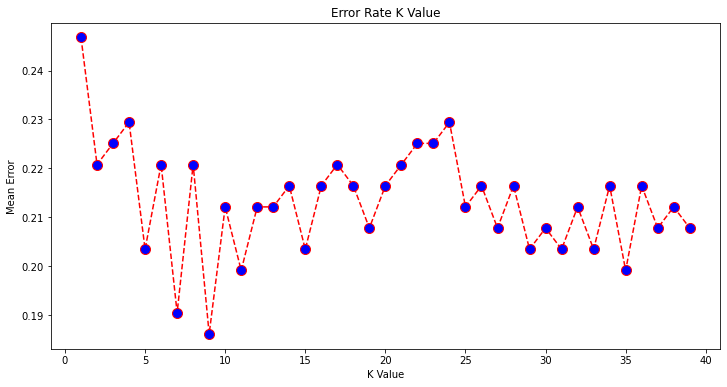

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### From the output we can see that the mean error is zero when the value of the K is between 5 and 9

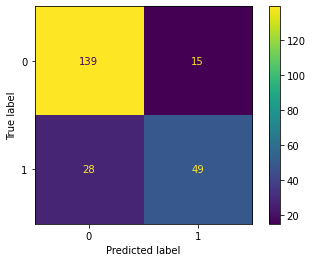

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()